<a href="https://colab.research.google.com/github/TaeangLim/First/blob/main/EDA_to_Prediction(DieTanic)_Study1/211228.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA TO Prediction (DieTanic)

sometimes life gas a cruel sense of humor, giving you the thing you always wanted at the worst time possible.

## Part1: Exploratory Data Analysis(EDA)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings 
warnings.filterwarnings('ignore')
#matplotlib inline

In [3]:
data=pd.read_csv('drive/MyDrive/titanic/train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The Age, Cabin and Embarked have null values. I will try to fix them

### How many Survived?

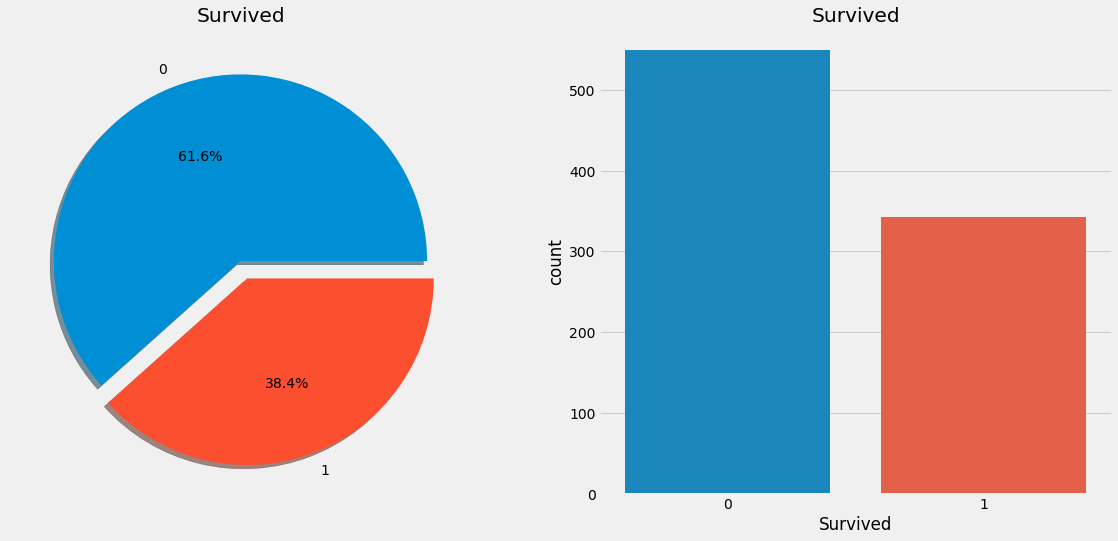

In [8]:
f, ax= plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

It is evident that not may passengers survived the accident.

Out of 891 passengers in training set, only around 350 survivied e.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Part Of Embarcation, Age, etc.

First let us understand the different types of features.

## Types Of Features

### Categorical Features:
A categorical Variable is one that has two or more categories and each value in that feature cna be categorised by them. For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such cariables.They are als known as Nominnal Variables.

Categorical Features in the dataset:Sex, Embarked.

### Ordinal Features:
An ordinal variales is similar to categorial values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we gave a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we  can have a relative sor in the variable.

Ordinal Features in the dataset:PClass

### Continous Feature:
A feature is said to be continous if it can take values between any two points or betwee the minimum or amximum values in the features column.

Continoues Features in the dataset:Age

## Analysing The Features

### Sex -> Categorical Feature

In [9]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

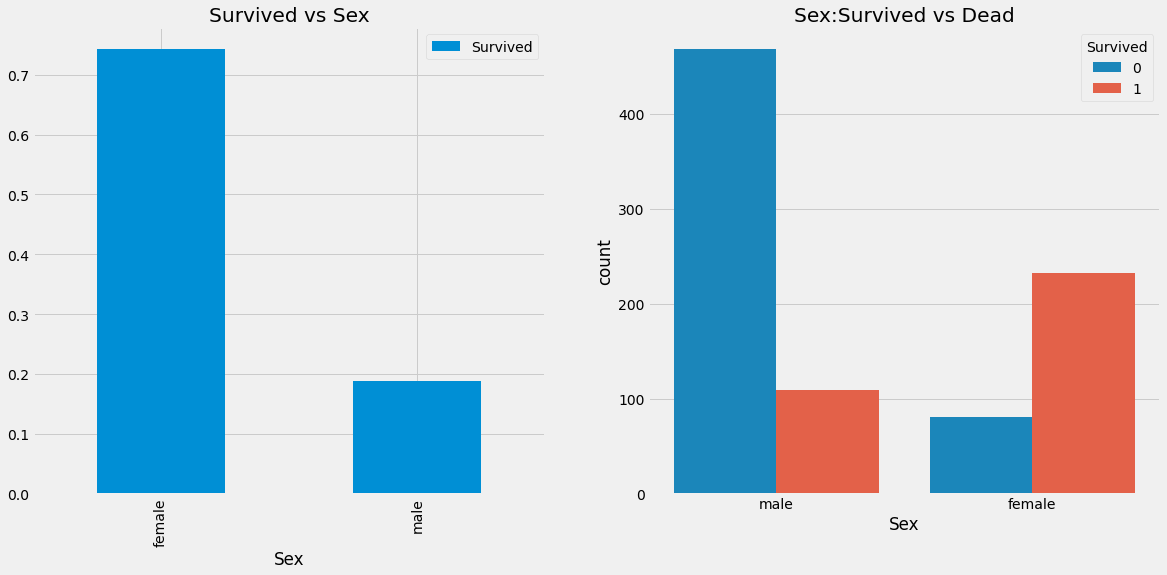

In [12]:
f, ax= plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a women on the ship is around 75% while that for men in around 18-19%.

This looks to be a very imortant feature for modeling. But is it the best?? Lets check other features.

### Pclass -> Ordinal Feature

In [13]:
pd.crosstab(data.Pclass, data.Survived, margins = True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


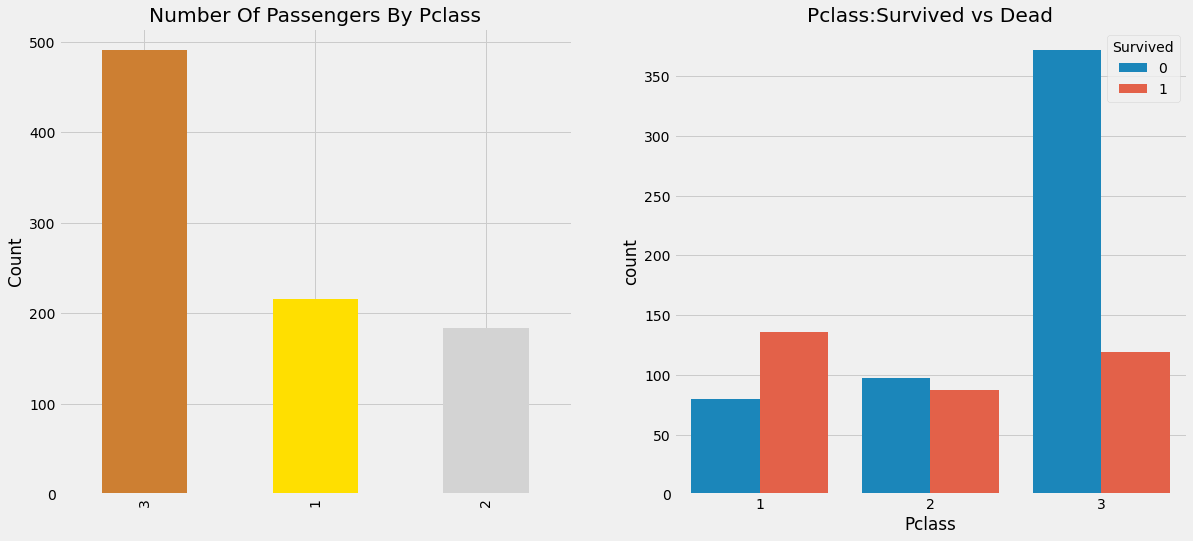

In [21]:
f, ax= plt.subplots(1,2,figsize=(18,8))
data.Pclass.value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

People say Money Can't Buy Everything. But we can clearly see that Passengers Of Pclass 1 were given a very high priority while rescue. Even though the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

For Pclass 1 %survived is around 63% while for Pclass 2 is around 48%. So money and status matters. Such a materialistic world.

Lets Dive in little bit more and check for other interesting observations. Lets check survivval rate with Sex and Pclass Together.

In [22]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

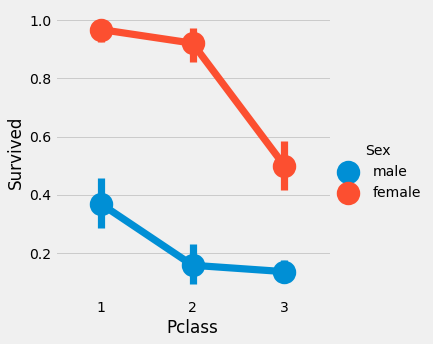

In [23]:
sns.factorplot('Pclass', 'Survived', hue='Sex',data=data)
plt.show()

We ues FactorPlot in this case, because they make the seperation of categorical values easy.

Looking at the CrossTab and the FactorPlot, we can easily infer that survival for Women froma Pcalss 1 is about 95-96%, as only 3 out of 94 from Pclass1 died.

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass 1 have a very low survival rate. 

Looks like Pclass is also an important feature. Lets analyse other features.

### Age -> Continous Feature

In [25]:
print('Oldest Passenger was of:',data.Age.max(), 'Years')
print('Youngest Passenger was of:',data.Age.min(), 'Years')
print('Average Age on the ship:',data.Age.mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


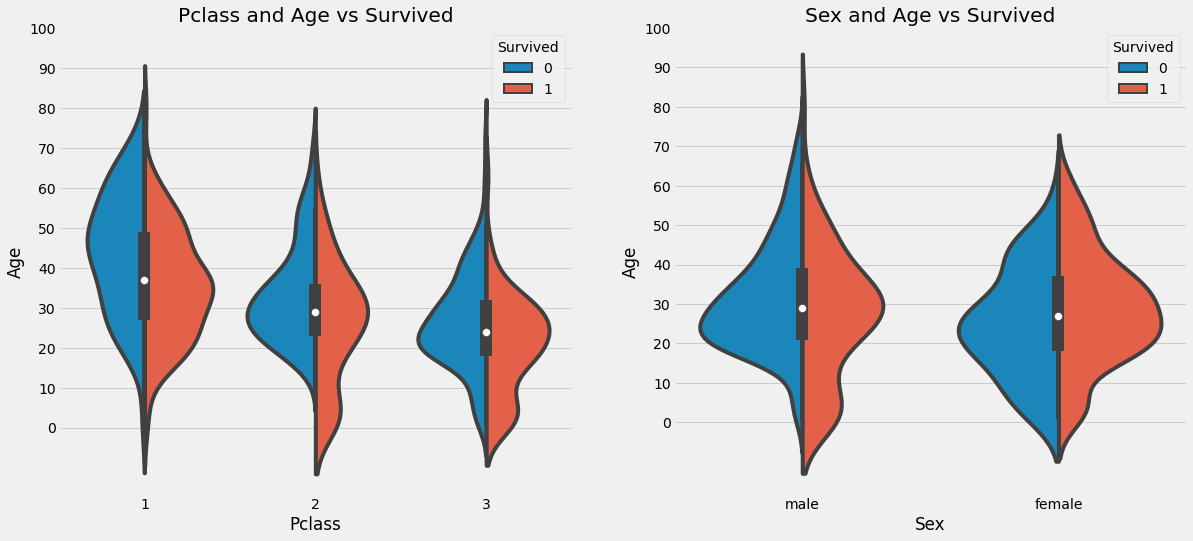

In [28]:
f, ax= plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex','Age', hue='Survived',data=data, split= True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

Observation:

1)The number of children increases with Pclass and the survival rate for passengers below Age 10(i.e children) looks to be good irrespective of the Pclass.

2)Survived chances for Passnegers aged 20-50 from Pclass 1 is high and is even better for Women.

3) For males, the survival chances decreases with an increase in age.

As we had seen earlier, the Age feature has 177 null values. To replace t hese NaN values, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just assign a  4 year kid with the mean age that is 29 years. Is there any way to find out what age-band dose the passenger lie?

Bingo!!!!, we can check the Name feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr an Mrs to the respective groups.

### "What's In A Name??" --> Feature :P

In [30]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') # lets extract the Salutations

Okay so here we are using the Regex:[A-Za-z]+).. So what it does is, it looks for strings which lie between A-Z or a-z and followed by a .(dot). So we successfully extract the Initials from the Name.

In [31]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r') # checking the Initial with Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Okay so there are some misspelled Initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

In [32]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [33]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

Filling NaN Ages

In [35]:
data.loc[(data.Age.isnull())& (data.Initial=='Mr'), 'Age']=33
data.loc[(data.Age.isnull())& (data.Initial=='Mrs'), 'Age']= 35.981818
data.loc[(data.Age.isnull())& (data.Initial=='Miss'), 'Age']=21.860000
data.loc[(data.Age.isnull())& (data.Initial=='Master'), 'Age']=4.574167
data.loc[(data.Age.isnull())& (data.Initial=='Other'), 'Age']=45.888889


In [37]:
data.Age.isnull().any()

False

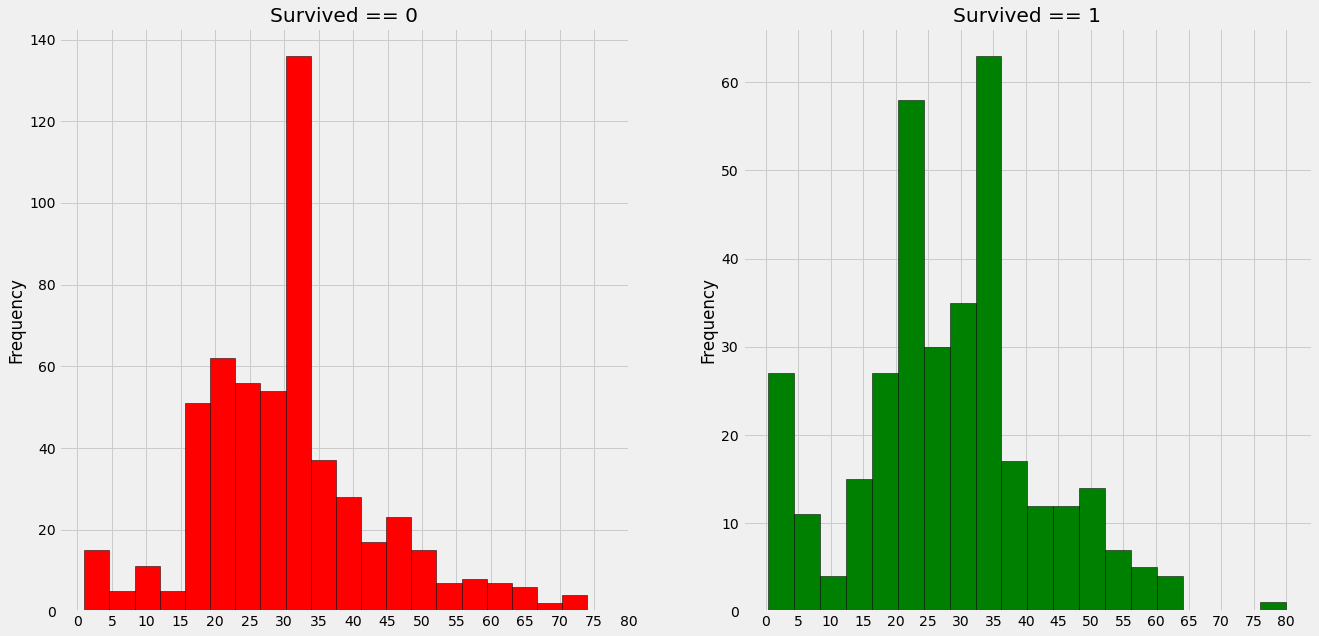

In [41]:
f, ax= plt.subplots(1, 2, figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived == 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived == 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

Observation:

1) The Toddlers(age<5)